# Python for Heliophysics Research
Increasingly, Python is used in place of lower-level languages like Fortran and IDL, due to portability, ease of learning and use, and access to an abundance of supporting libraries. Most linux instillations will have python interpreters out-of-the-box, and the windows store provides an up-to-date binary for windows users.  
Best Practice dictates that we use a *virtual environment*, or a virtualized instance of the python interpreter that has only the necessary packages installed. This is done using the following method

```python
print("Hello World")
```  

$\mathbf{Z}$  

$E = mc^2$

In [1]:
#!python -m venv venv #the ! command executes in the default terminal
#this creates our virtual environment called venv

In [1]:
#!venv\Scripts\activate.bat 

Now that we have a python environment set up, let's look at the first (and in my opinion most important) tool; HAPI

HAPI (or Heliophysics API [application programming interface]) provides a robust data aquisition method for most space physics data availiable on the open internet. A list of usable servers is provided at http://hapi-server.org/servers

In [2]:
# Use pip to install the hapiclient and hapiplot, this will take a while
#!pip install hapiclient
#!pip install hapiplot

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/41.7 kB ? eta -:--:--
     ---------------------------------------- 41.7/41.7 kB ? eta 0:00:00
     ---------------------------------------- 0.0/121.1 kB ? eta -:--:--
     -------------------------------------- 121.1/121.1 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
     -------------------------------------- 301.8/301.8 kB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     --- ------------------------------------ 1.1/11.6 MB 23.1 MB/s eta 0:00:01
     ------- -------------------------------- 2.3/11.6 MB 24.6 MB/s eta 0:00:01
     ----------- ---------------------------- 3.4/11.6 MB 24.4 MB/s eta 0:00:01
     --------------- ------------------------ 4.6/11.6 MB 24.7 MB/s eta 0:00:01
     -------------------- ------------------- 6.0/11.6 

  DEPRECATION: hapiclient is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
     - -------------------------------------- 0.2/8.0 MB 7.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/8.0 MB 10.5 MB/s eta 0:00:01
     --------------- ------------------------ 3.0/8.0 MB 23.8 MB/s eta 0:00:01
     --------------------------- ------------ 5.5/8.0 MB 32.0 MB/s eta 0:00:01
     ------------------------------- -------- 6.3/8.0 MB 28.6 MB/s eta 0:00:01
     ---------------------------------------- 8.0/8.0 MB 30.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
     ---------------------------------- ----- 1.9/2.2 MB 40.1 MB/s eta 0:00:01
     ---------------------------------------- 2.2/2.2 MB 35.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/56.1 kB ? eta -:--:--
     ---------------------------------------- 56.1/56

  DEPRECATION: hapiplot is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Now let's grab some data, for example, we can look at the voyager2 satelite as it moves away from the earth


from hapiclient import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'VOYAGER2_COHO1HR_MERGED_MAG_PLASMA'

parameters = 'heliocentricDistance,ABS_B,V,protonDensity'
start      = '1977-01-01T00:00:00Z' # min 1977-01-01T00:00:00Z
stop       = '1990-01-03T00:00:0' # max 2020-12-31T11:00:00Z

data, meta = hapi(server, dataset, parameters, start, stop)


In [4]:
data

array([(b'1977-01-01T00:00:00.000Z', -1.00000000e+31, -1.e+31, -1.00e+31, -1.00000000e+31),
       (b'1977-01-01T01:00:00.000Z', -1.00000000e+31, -1.e+31, -1.00e+31, -1.00000000e+31),
       (b'1977-01-01T02:00:00.000Z', -1.00000000e+31, -1.e+31, -1.00e+31, -1.00000000e+31),
       ...,
       (b'1990-01-02T21:00:00.000Z',  3.10699997e+01, -1.e+31, -1.00e+31, -1.00000000e+31),
       (b'1990-01-02T22:00:00.000Z',  3.10699997e+01, -1.e+31, -1.00e+31, -1.00000000e+31),
       (b'1990-01-02T23:00:00.000Z',  3.10699997e+01, -1.e+31,  3.68e+02,  7.74999987e-03)],
      dtype=[('Time', 'S24'), ('heliocentricDistance', '<f8'), ('ABS_B', '<f8'), ('V', '<f8'), ('protonDensity', '<f8')])

In [5]:
meta

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesV.html#VOYAGER2_COHO1HR_MERGED_MAG_PLASMA',
 'contact': 'N. Ness (MAG) and J. Richardson (PLS) @ Bartol, MIT',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'heliocentricDistance',
   'description': 'Heliocentric Distance',
   'units': 'AU',
   'type': 'double',
   'fill': '-1.0E31'},
  {'name': 'ABS_B',
   'description': 'B Field Magnitude (average of fine scale magnitudes)',
   'units': 'nT',
   'type': 'double',
   'fill': '-1.0E31'},
  {'name': 'V',
   'description': 'Bulk Flow Speed',
   'units': 'km/s',
   'type': 'double',
   'fill': '-1.0E31'},
  {'name': 'protonDensity',
   'description': 'Proton density',
   'units': 'n/cc',
   'type': 'double',
   'fill': '-1.0E31'}],
 'startDate': '1977-01-01T00:00:00Z',
 'stopDate': '2020-12-31T11:00:00Z',
 'status': {'code': 1200, 'message': 'OK'},
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi

1977-01-01 00:00:00+00:00
1990-01-02 23:00:00+00:00


c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


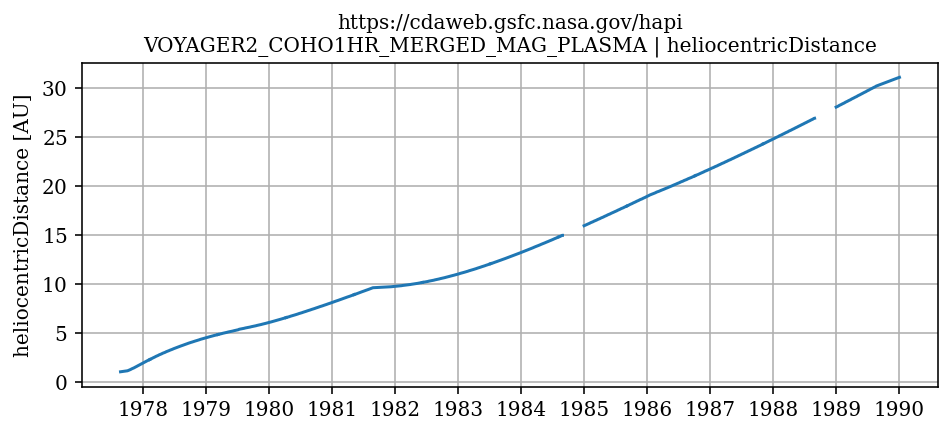

1977-01-01 00:00:00+00:00
1990-01-02 23:00:00+00:00


c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


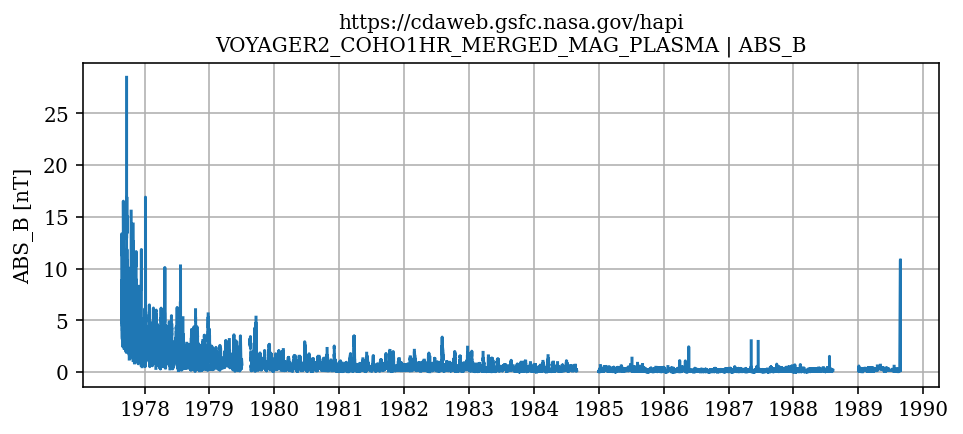

1977-01-01 00:00:00+00:00
1990-01-02 23:00:00+00:00


c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


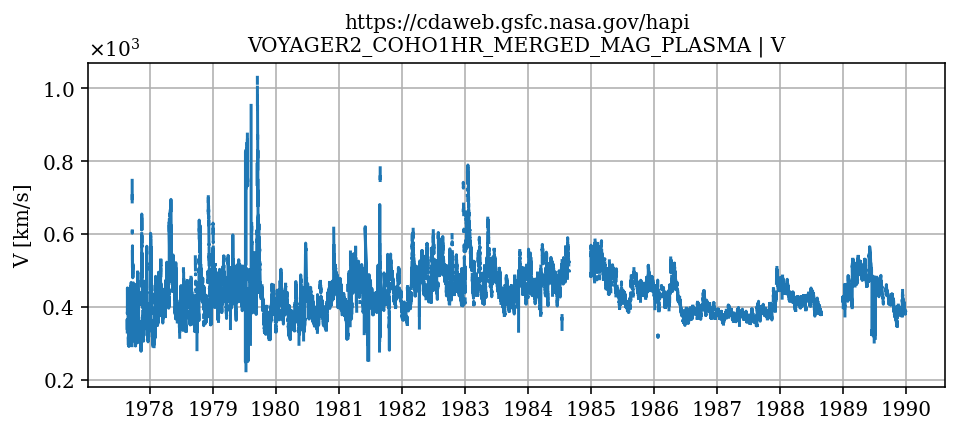

1977-01-01 00:00:00+00:00
1990-01-02 23:00:00+00:00


c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


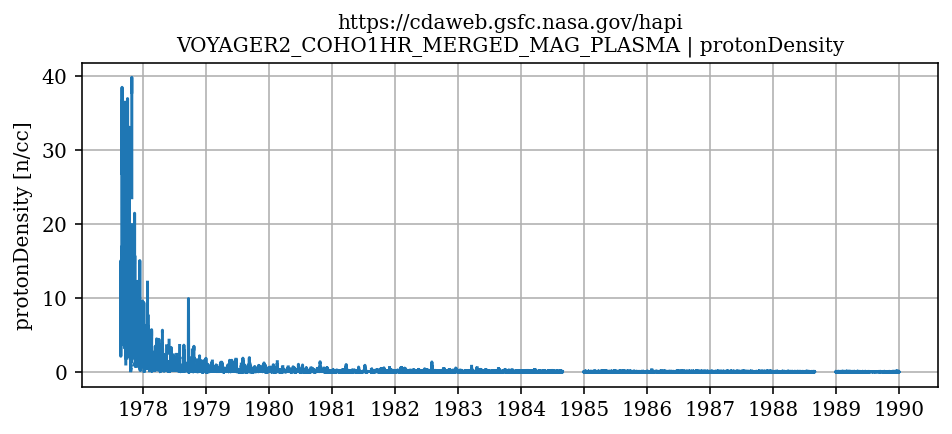

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesV.html#VOYAGER2_COHO1HR_MERGED_MAG_PLASMA',
 'contact': 'N. Ness (MAG) and J. Richardson (PLS) @ Bartol, MIT',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'heliocentricDistance',
   'description': 'Heliocentric Distance',
   'units': 'AU',
   'type': 'double',
   'fill': '-1.0E31',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'ABS_B',
   'description': 'B Field Magnitude (average of fine scale magnitudes)',
   'units': 'nT',
   'type': 'double',
   'fill': '-1.0E31',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'V',
   'description': 'Bulk Flow Speed',
   'units': 'km/s',
   'type': 'double',
   'fill': '-1.0E31',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'protonDensity',
   'description': 'Proton density',
   'units': 'n/cc',
   'type': 'double',
 

In [7]:
#let's plot this data using hapiplot
from hapiplot import hapiplot
hapiplot(data,meta)

c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiclient\hapitime.py:284: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()
c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


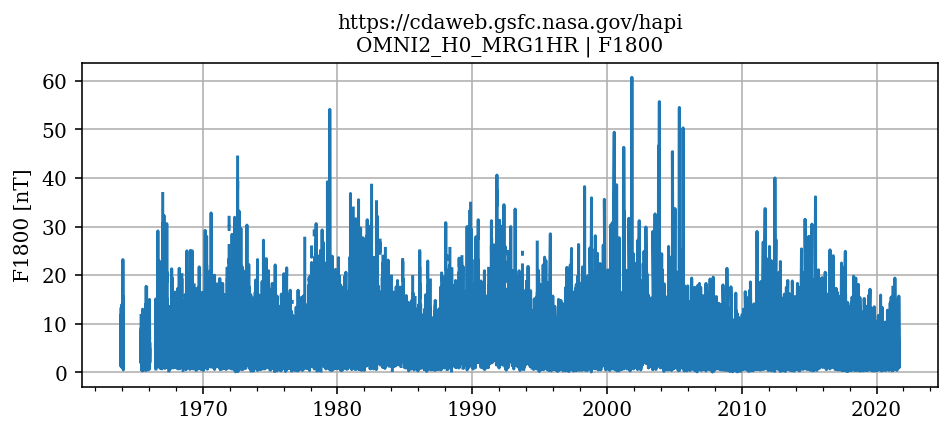

c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


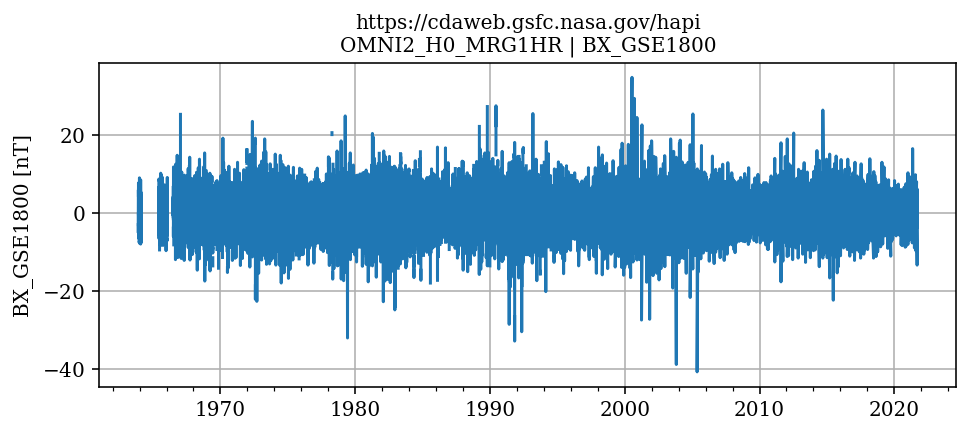

c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


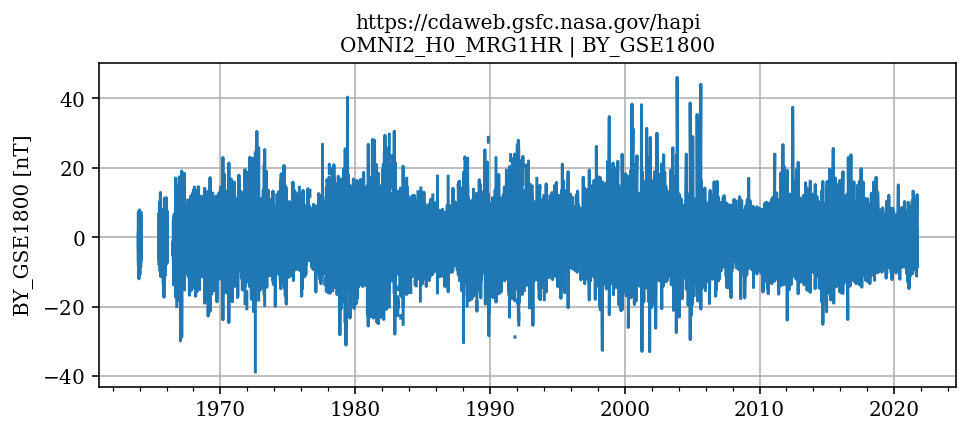

c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


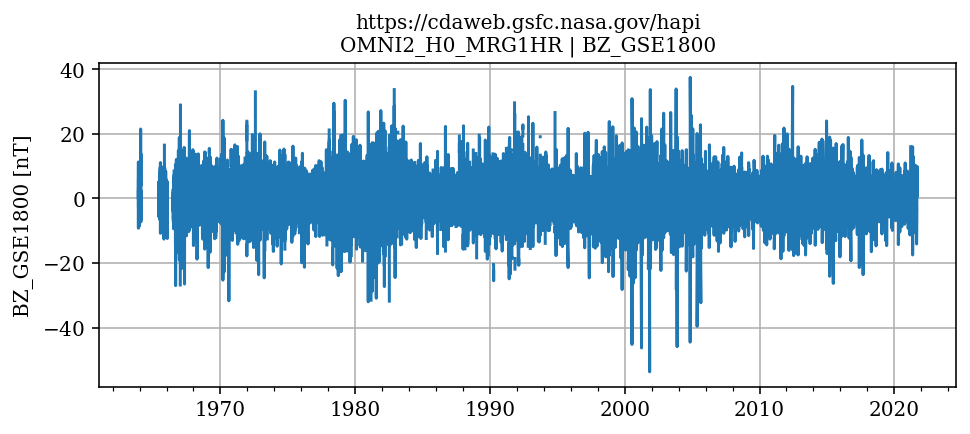

c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


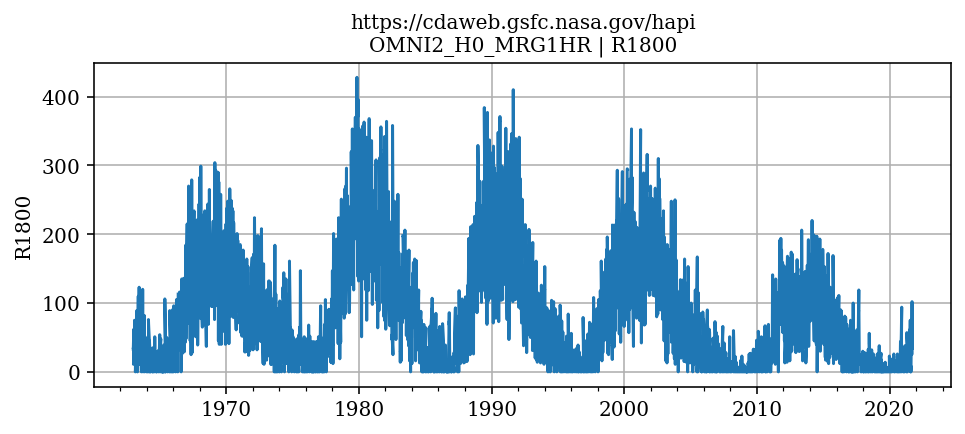

c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


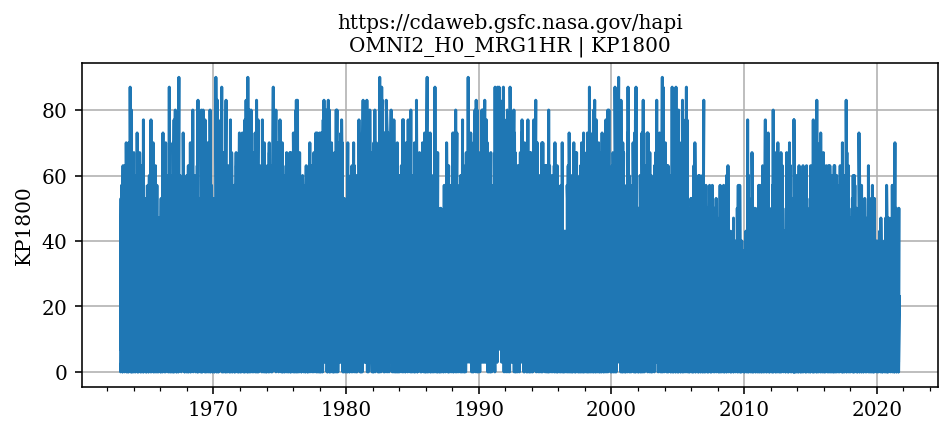

c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


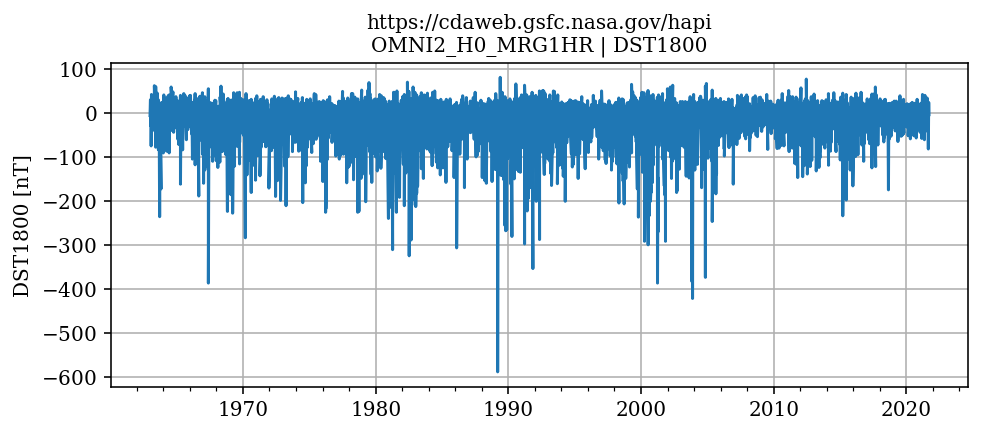

c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiplot\plot\datetick.py:492: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(labels)


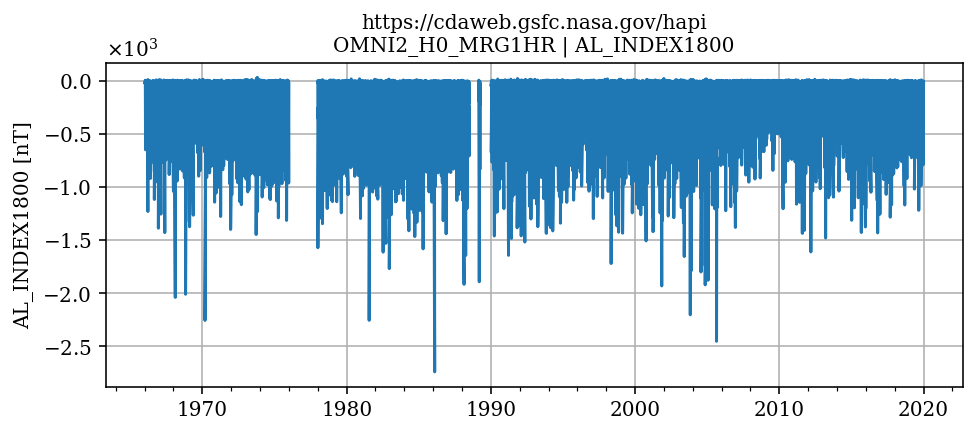

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR',
 'contact': 'J.H. King, N. Papitashvili @ ADNET, NASA GSFC',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'F1800',
   'description': '1AU IP Magnitude of average field vector (nT)',
   'units': 'nT',
   'type': 'double',
   'fill': '999.9',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'BX_GSE1800',
   'description': '1AU IP Bx (nT), GSE',
   'units': 'nT',
   'type': 'double',
   'fill': '999.9',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'BY_GSE1800',
   'description': '1AU IP By (nT), GSE',
   'units': 'nT',
   'type': 'double',
   'fill': '999.9',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'BZ_GSE1800',
   'description': '1AU IP Bz (nT), GSE',
   'units': 'nT',
   'type': 'double',
   'fill': '999.9',
   'hapiplot': {'fig

In [10]:
#Using CDAWeb to examine solar cycle effcects on space weather over time
#we'll use the OMNI dataset 

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'OMNI2_H0_MRG1HR'

parameters = 'F1800,BX_GSE1800,BY_GSE1800,BZ_GSE1800,R1800,KP1800,DST1800,AL_INDEX1800'
start      = '1963-01-01T00:00:00Z' # min 1963-01-01T00:00:00Z
stop       = '2021-09-13T17:00:00.000Z' # max 2024-05-23T12:00:00Z

data, meta = hapi(server, dataset, parameters, start, stop)
hapiplot(data, meta)

In [35]:
#now we will go over a particular space weather event in detail
start = "2000-07-15T00:00:00"
stop = "2000-07-19T00:00:00"


server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'OMNI2_H0_MRG1HR'
# Notes:
# 1. Use parameters='' to request all parameters from OMNI2_H0_MRG1HR.
# 2. Multiple parameters can be requested using a comma-separated
#    list, e.g., parameters='Rot1800,IMF1800'
parameters = 'F1800,N1800,V1800,R1800,KP1800,DST1800,AL_INDEX1800'
data, meta = hapi(server, dataset, parameters, start, stop)
#hapiplot(data,meta)


c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiclient\hapitime.py:284: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()
c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiclient\hapitime.py:284: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()
c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\hapiclient\hapitime.py:284: UserWarning: The argument 'infer_datetim

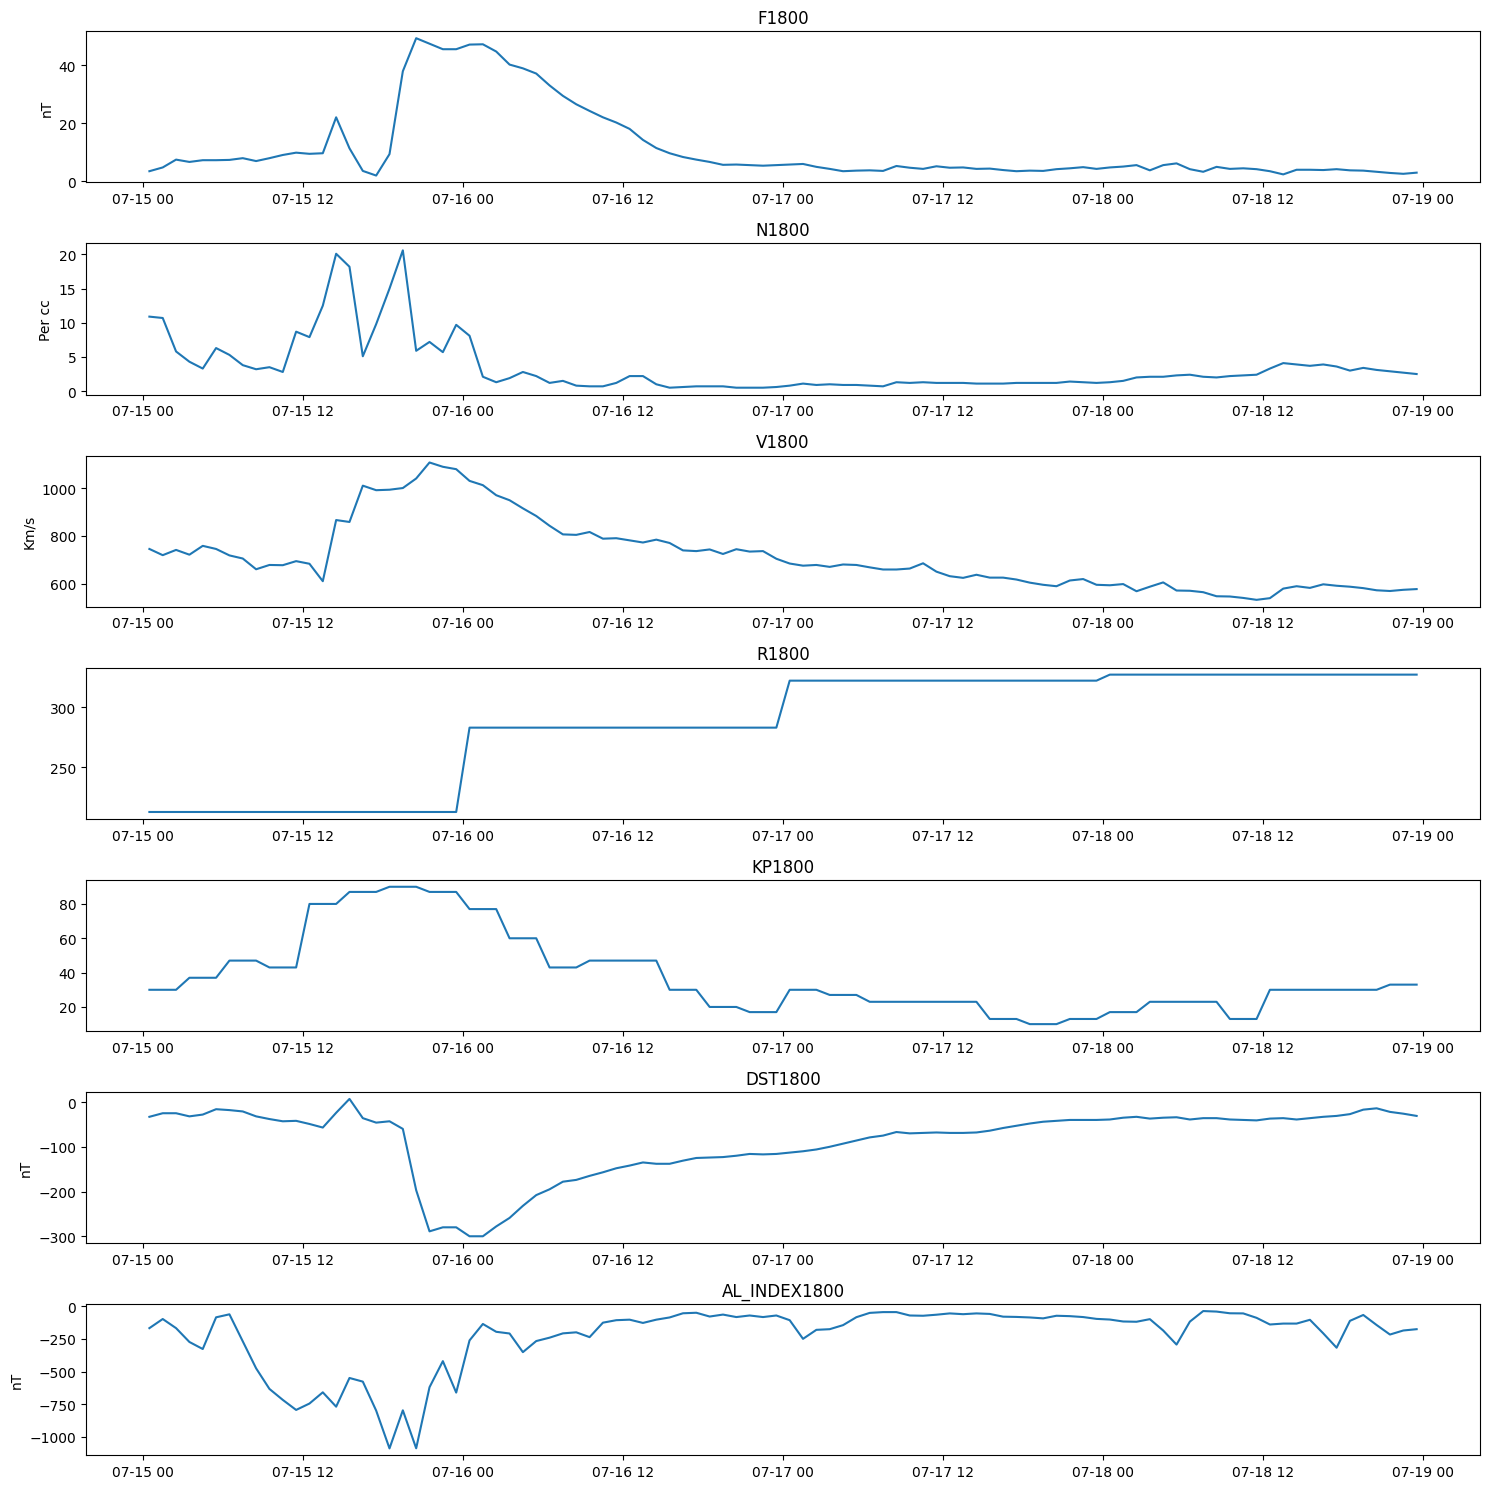

In [36]:
#by the way we don't have to use the hapiplot utility, we can just use matplotlib 
import matplotlib.pyplot as plt
from hapiclient import hapitime2datetime
#we have to convert hapitime to a datetime using the helper function
#we want to stack all of the parameter plots for the sake it being easier to read
fig, axs = plt.subplots(7,1,figsize=(15,15))
for i, param in enumerate(parameters.split(',')):
    axs[i].plot(hapitime2datetime(data['Time']), data[param])
    axs[i].set_title(param)
    axs[i].set_ylabel(meta['parameters'][i+1]['units']) #this gets a little funky because the metadata is a very complex dictionary
    #set the axis lables using the metadata
plt.tight_layout()
fig

In [19]:
meta

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR',
 'contact': 'J.H. King, N. Papitashvili @ ADNET, NASA GSFC',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'F1800',
   'description': '1AU IP Magnitude of average field vector (nT)',
   'units': 'nT',
   'type': 'double',
   'fill': '999.9',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'N1800',
   'description': '1AU IP Ion number density (per cc)',
   'units': 'Per cc',
   'type': 'double',
   'fill': '999.9',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'V1800',
   'description': '1AU IP plasma flow speed (km/s)',
   'units': 'Km/s',
   'type': 'double',
   'fill': '9999.0',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'R1800',
   'description': 'Daily sunspot number V2, from  http://sidc.oma.be/silso/datafiles/ (1963/001-2024/

In [38]:
data

array([(b'2000-05-03T20:20:00.000002235Z', [[-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768], ..., [-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768]]),
       (b'2000-05-04T03:00:00.000000000Z', [[-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768], ..., [-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768]]),
       (b'2000-05-04T03:10:00.000004470Z', [[-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768], [-32768, -32768, -32768, ..., -32768, -32768, -32768], ..., [-32768, -32768, -32768,

In [39]:
meta

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesI.html#IMAGE_M2_EUV',
 'contact': 'R. M. Katus @ Eastern Michigan University',
 'parameters': [{'name': 'Time',
   'length': 30,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'bins': [{'name': 'X_Axis',
     'centers': [-6.0,
      -5.95,
      -5.9,
      -5.85,
      -5.8,
      -5.75,
      -5.7,
      -5.65,
      -5.6,
      -5.55,
      -5.5,
      -5.45,
      -5.4,
      -5.35,
      -5.3,
      -5.25,
      -5.2,
      -5.15,
      -5.1,
      -5.05,
      -5.0,
      -4.95,
      -4.9,
      -4.85,
      -4.8,
      -4.75,
      -4.7,
      -4.65,
      -4.6,
      -4.55,
      -4.5,
      -4.45,
      -4.4,
      -4.35,
      -4.3,
      -4.25,
      -4.2,
      -4.15,
      -4.1,
      -4.05,
      -4.0,
      -3.95,
      -3.9,
      -3.85,
      -3.8,
      -3.75,
      -3.7,
      -3.65,
      -3.6,
      -3.55,
      -3.5,
      -3.45,
      -3.4,
      -3.35,
      -3.3,
      -3.25

# Sunpy
sunpy is a python library that provides a suite of tools for solar physics research. It is built on top of the astropy library, and provides a number of tools for data analysis, visualization, and manipulation.
It is most often used for manipulating solar image data, but can be used for other solar physics data as well.  
In this example we are going to find a picture of the sun from the bastille day event in 2000, and then plot it using sunpy

In [1]:
!pip install sunpy

     ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.2 MB 5.3 MB/s eta 0:00:01
     ----------- ---------------------------- 0.9/3.2 MB 9.6 MB/s eta 0:00:01
     ---------------------------------- ----- 2.8/3.2 MB 20.1 MB/s eta 0:00:01
     ---------------------------------------- 3.2/3.2 MB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
     ------------ --------------------------- 2.1/6.4 MB 43.8 MB/s eta 0:00:01
     ------------------- -------------------- 3.1/6.4 MB 33.3 MB/s eta 0:00:01
     ------------------- -------------------- 3.1/6.4 MB 33.3 MB/s eta 0:00:01
     ------------------- -------------------- 3.1/6.4 MB 33.3 MB/s eta 0:00:01
     ------------------- -------------------- 3.1/6.4 MB 33.3 MB/s eta 0:00:01
     ------------------- -------------------- 3.1/6.4 MB 33.3 MB/s eta 0:00:01
     ------------------- -------------------- 3.1/6.4 MB 33.3 MB/s eta


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#!pip install requests
#!pip install bs4
#!pip install lxml
#!pip install zeep
#!pip install drms
#you may or may not need these pip installs, but it was broken for me without them 0_0
from sunpy.net import Fido #Fido is the data searching and downloading tool for sunpy
from sunpy.net import attrs as a #sunpy attributes are used for building fido search queries
import astropy.units as u #astropy units are the standard for units in PyHC packages



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\SuperDARNUG\PyHC_tutorial\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
start = "2024-05-10T00:00:00"
end = "2024-05-20T00:00:00"
#this is the approximate time range of the crazy solar flare we saw last month
#we can use the Fido search tool to find the data we need
#we can first look at the GOES x-ray data, which makes it easy to see flare events

In [3]:
time_range = a.Time(start, end)
q = Fido.search(time_range, a.Instrument('XRS'))

here we have a list of observations that the goes sat found during the bastille day event, we might as well download all of them and then plot them to see what's happening

In [4]:
#grab the data usiong the Fido.fetch function
files = Fido.fetch(q, path= './data{instrument}') #this specifies the path to save the data to

Files Downloaded:   0%|          | 0/44 [00:00<?, ?file/s]

Files Downloaded:  45%|████▌     | 20/44 [00:01<00:01, 15.15file/s]





















Files Downloaded:  50%|█████     | 22/44 [00:02<00:03,  7.23file/s]



























Files Downloaded:  55%|█████▍    | 24/44 [00:02<00:03,  6.14file/s]



















Files Downloaded:  59%|█████▉    | 26/44 [00:03<00:03,  5.36file/s]



Files Downloaded:  61%|██████▏   | 27/44 [00:03<00:02,  5.77file/s]































Files Downloaded:  66%|██████▌   | 29/44 [00:03<00:03,  4.58file/s]






















































Files Downloaded:  68%|██████▊   | 30/44 [00:04<00:04,  3.17file/s]
























Files Downloaded:  70%|███████   | 31/44 [00:04<00:04,  3.12file/s]




















Files Downloaded:  73%|███████▎  | 32/44 [00:05<00:03,  3.06file/s]









Files Downloaded:  77%|███████▋  | 34/44 [00:05<00:02,  4.27file/s]



















Files Downloaded:  80%|███████▉  | 35/44 [00:05<00:02,  4.05file/s]
















Files Dow

In [44]:
#for GOES data (and most data) we get some fits files
files

['dataXRS\\sci_xrsf-l2-flx1s_g16_d20240510_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240511_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240512_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240513_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240514_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240515_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240516_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240517_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240518_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240519_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-flx1s_g16_d20240520_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-avg1m_g16_d20240510_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-avg1m_g16_d20240511_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-avg1m_g16_d20240512_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-avg1m_g16_d20240513_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-avg1m_g16_d20240514_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-avg1m_g16_d20240515_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-avg1m_g16_d20240516_v2-2-0.nc', 'dataXRS\\sci_xrsf-l2-avg1m


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


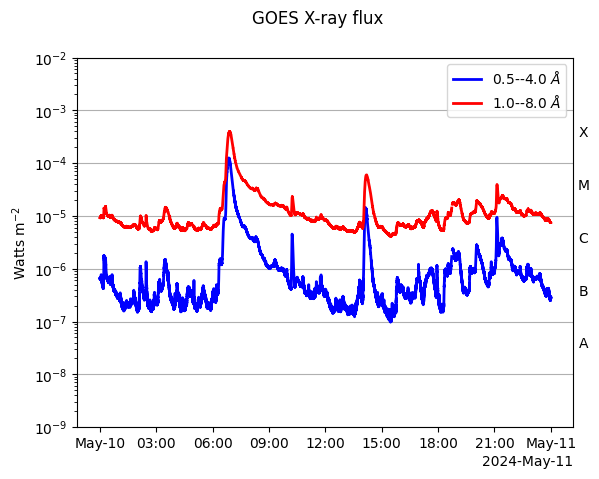

In [5]:
#we can use the sunpy package to read the fits files
#!pip install h5netcdf
import sunpy.timeseries as ts
goes = ts.TimeSeries(files[0])
goes.peek()

In [10]:
#this looks like a very obvious flare event, so we can drill down to the part that is visably flare-like
new_start = "2024-05-10T03:00:00"
new_end = "2024-05-10T09:00:00"
time_range = a.Time(new_start, new_end)
q = Fido.search(time_range, a.Instrument.aia & a.Wavelength(193*u.angstrom) & a.Sample(30*u.minute))
q

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2024-05-10 03:00:04.000,2024-05-10 03:00:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2024-05-10 03:30:04.000,2024-05-10 03:30:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2024-05-10 04:00:06.000,2024-05-10 04:00:07.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2024-05-10 04:30:04.000,2024-05-10 04:30:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2024-05-10 05:00:04.000,2024-05-10 05:00:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2024-05-10 05:30:04.000,2024-05-10 05:30:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2024-05-10 06:00:04.000,2024-05-10 06:00:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2024-05-10 06:30:04.000,2024-05-10 06:30:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


In [11]:
files = Fido.fetch(q, path= './data{instrument}')

Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]



































































































































































































































Files Downloaded:   8%|▊         | 1/12 [00:06<01:14,  6.75s/file]
























































































































































































































































































































































































































































































































Files Downloaded:  17%|█▋        | 2/12 [00:12<01:04,  6.43s/file]














































































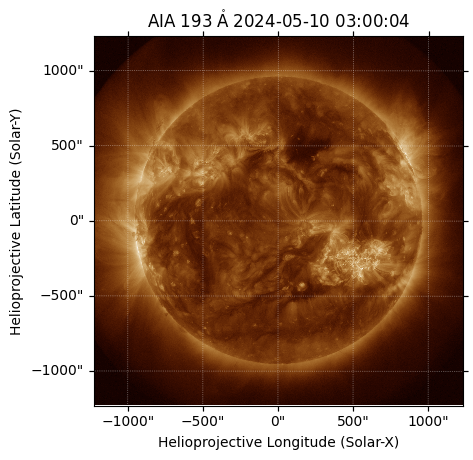

In [15]:
import matplotlib.pyplot as plt
import sunpy.map
from sunpy.visualization.colormaps import color_tables as ct

aia_map = sunpy.map.Map(files[0])
fig = plt.figure()
ax = plt.subplot(projection=aia_map)
#we use the astropy package to specify the units for the color table, we know our data is 193 angstroms in wavelength
aia_map.plot(axes=ax, cmap=ct.aia_color_table(193*u.angstrom))
plt.show()

In [23]:
#Now we can use this same method to make a move over our selected time period
import os
number = 0
for file in files:
    aia_map = sunpy.map.Map(file)
    fig = plt.figure()
    ax = plt.subplot(projection=aia_map)
    #we use the astropy package to specify the units for the color table, we know our data is 193 angstroms in wavelength
    aia_map.plot(axes=ax, cmap=ct.aia_color_table(193*u.angstrom))
    plt.savefig(f'./images/{number}.png')
    number += 1
    plt.close()
#now combine the images into a gif

#!pip install imageio
import imageio
images = []
for file in os.listdir('./images'):
    images.append(imageio.imread(f'./images/{file}'))
imageio.mimsave('flare.gif', images, duration=0.5, loop=True)




[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\coach\AppData\Local\Temp\ipykernel_18576\2372012564.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'./images/{file}'))


On visual inspection, it looks like there could be a flare near the bottom right of the sun, let's zoom in on that region and see if we can see anything!

In [25]:
#we will zoom from 500 to 1000 " in the x direction and 0 to -500 in the y direction
from astropy.coordinates import SkyCoord
bottom_left= SkyCoord(500*u.arcsec, -500*u.arcsec, frame=aia_map.coordinate_frame)
top_right = SkyCoord(1000*u.arcsec, 0*u.arcsec, frame=aia_map.coordinate_frame)
aia_submap = aia_map.submap(bottom_left, top_right=top_right)





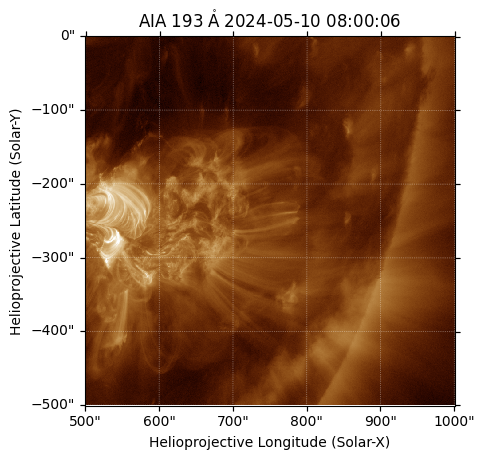

In [26]:
fig = plt.figure()
ax = plt.subplot(projection=aia_submap)
aia_submap.plot(axes=ax, cmap=ct.aia_color_table(193*u.angstrom))
plt.show()


You could make another movie in this position, but I will leave that as an excerise